# 노이즈 제거

In [1]:
from keras.utils import set_random_seed, plot_model
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

In [2]:
set_random_seed(11)

In [3]:
# # 이미지를 넘파이배열로 변환
# noisy_list=os.listdir('./Noisy_Documents/noisy/')
# x_train1=[]
# x_train2=[]
# for i in noisy_list:
#     img = Image.open(f'./Noisy_Documents/noisy/{i}')
#     img=np.array(img)
#     if img.shape == (420, 540, 3):
#         x_train1.append(np.array(img))
#     elif img.shape == (258, 540, 3):
#         x_train2.append(np.array(img))
#     else: print(i, img.shape)

In [23]:
# 이미지를 넘파이배열로 변환
noisy_list=os.listdir('./Noisy_Documents/noisy/')
x_train=[]
for i in noisy_list:
    img = Image.open(f'./Noisy_Documents/noisy/{i}')
    img = img.convert('L')
    img.save(f'./Noisy_Documents/noisy2/{i}')
    
    img = plt.imread(f'./Noisy_Documents/noisy2/{i}')
    img=resize(img, (500, 500))
    x_train.append(np.array(img))

In [24]:
x_train=np.array(x_train)
x_train.shape

(216, 500, 500)

In [25]:
x_train[0]

array([[0.9342055 , 0.91278434, 0.905098  , ..., 0.6514824 , 0.68176943,
        0.7258353 ],
       [0.9162855 , 0.91278434, 0.905098  , ..., 0.6024157 , 0.63814276,
        0.70876867],
       [0.91720784, 0.92454904, 0.91592157, ..., 0.6043922 , 0.6060863 ,
        0.6431686 ],
       ...,
       [0.8846745 , 0.88382745, 0.88360786, ..., 0.9792941 , 0.9195608 ,
        0.7555137 ],
       [0.8927498 , 0.8812298 , 0.87240785, ..., 0.95990586, 0.9699702 ,
        0.9887749 ],
       [0.8897631 , 0.86960316, 0.8553412 , ..., 0.95297253, 0.96666354,
        0.97074825]], dtype=float32)

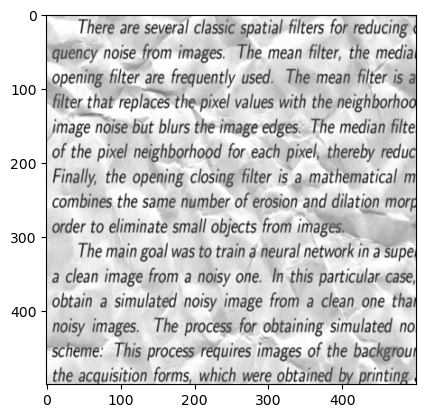

In [26]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [27]:
# 이미지를 넘파이배열로 변환
clean_list=os.listdir('./Noisy_Documents/clean/')
y_train=[]
for i in clean_list:
    img = plt.imread(f'./Noisy_Documents/clean/{i}')
    img=resize(img, (500, 500))
    y_train.append(np.array(img))

In [28]:
y_train=np.array(y_train)
y_train.shape

(216, 500, 500)

In [29]:
y_train[0]

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.9995294 , 0.97101176,
        0.7569882 ],
       [1.        , 1.        , 1.        , ..., 1.        , 0.9991718 ,
        0.99634826],
       [1.        , 1.        , 1.        , ..., 1.        , 0.9968251 ,
        0.98600155]], dtype=float32)

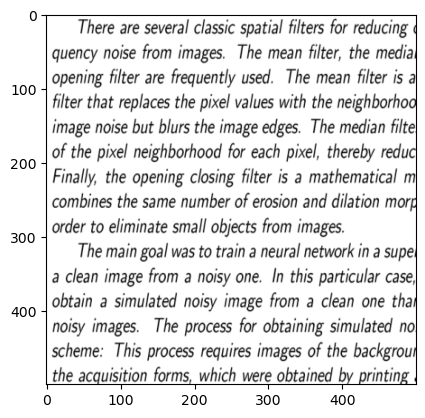

In [30]:
plt.imshow(y_train[0], cmap='gray')
plt.show()

In [31]:
# # 스케일링
# x_train=x_train/255.0
# y_train=y_train/255.0

In [32]:
# 데이터셋 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, random_state=11)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=11)


In [33]:
x_train.shape, x_val.shape, x_test.shape

((121, 500, 500), (41, 500, 500), (54, 500, 500))

In [34]:
def createAEModel(n_node):
    
    model=Sequential()
    # 입력
    model.add(Conv2D(n_node, kernel_size=3, padding='same', input_shape=(500, 500, 1)))
    
    # 출력
    model.add(Conv2D(1,kernel_size=3, padding='same', activation='sigmoid'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [96]:
def createModel(n_node):
    model=Sequential()
    model.add(Dense(units=n_node, activation='relu', input_shape=(30000,)))
    model.add(Dense(30000, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [35]:
model=createAEModel(50)

In [41]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
4/4 [==============================] - 12s 3s/step - loss: 0.0421 - val_loss: 0.0418
Epoch 2/10
4/4 [==============================] - 12s 3s/step - loss: 0.0412 - val_loss: 0.0409
Epoch 3/10
4/4 [==============================] - 12s 3s/step - loss: 0.0404 - val_loss: 0.0402
Epoch 4/10
4/4 [==============================] - 12s 3s/step - loss: 0.0398 - val_loss: 0.0397
Epoch 5/10
4/4 [==============================] - 12s 3s/step - loss: 0.0393 - val_loss: 0.0392
Epoch 6/10
4/4 [==============================] - 14s 4s/step - loss: 0.0388 - val_loss: 0.0388
Epoch 7/10
4/4 [==============================] - 15s 4s/step - loss: 0.0384 - val_loss: 0.0383
Epoch 8/10
4/4 [==============================] - 14s 4s/step - loss: 0.0379 - val_loss: 0.0377
Epoch 9/10
4/4 [==============================] - 13s 3s/step - loss: 0.0373 - val_loss: 0.0371
Epoch 10/10
4/4 [==============================] - 13s 3s/step - loss: 0.0367 - val_loss: 0.0365


16/16 [==============================] - 0s 9ms/step


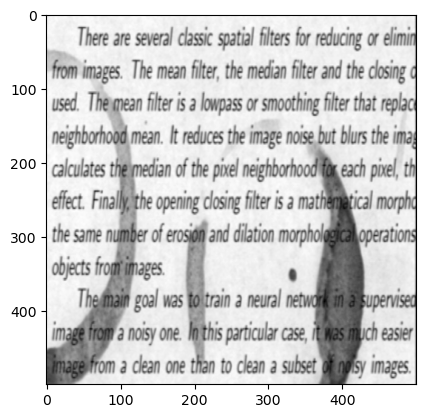

In [42]:
pre_out=model.predict(x_test[15].reshape(500,500,1))
plt.imshow(pre_out.reshape(500,500), cmap='gray')
plt.show()

In [44]:
model.predict(x_test[15].reshape(500,500,1)), x_test[15]

16/16 [==============================] - 0s 11ms/step


(array([[[[0.55884856]],
 
         [[0.611097  ]],
 
         [[0.6126298 ]],
 
         ...,
 
         [[0.61319464]],
 
         [[0.60155517]],
 
         [[0.5703896 ]]],
 
 
        [[[0.5588581 ]],
 
         [[0.6110967 ]],
 
         [[0.6125757 ]],
 
         ...,
 
         [[0.6132189 ]],
 
         [[0.60158354]],
 
         [[0.5704159 ]]],
 
 
        [[[0.55901164]],
 
         [[0.6110918 ]],
 
         [[0.6117033 ]],
 
         ...,
 
         [[0.61360997]],
 
         [[0.6020405 ]],
 
         [[0.57083917]]],
 
 
        ...,
 
 
        [[[0.5214167 ]],
 
         [[0.54101354]],
 
         [[0.5416608 ]],
 
         ...,
 
         [[0.61439353]],
 
         [[0.60263664]],
 
         [[0.5710276 ]]],
 
 
        [[[0.5231128 ]],
 
         [[0.5441444 ]],
 
         [[0.54465264]],
 
         ...,
 
         [[0.6137507 ]],
 
         [[0.6023945 ]],
 
         [[0.5711715 ]]],
 
 
        [[[0.523218  ]],
 
         [[0.54433846]],
 
         [[0.5448381 ]],

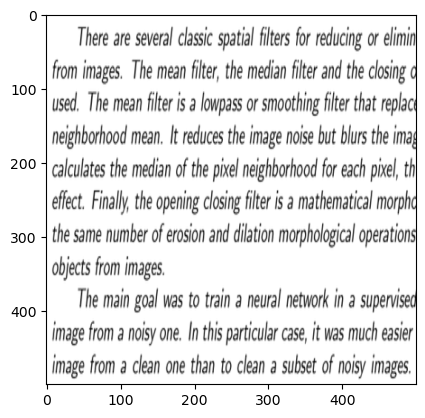

In [39]:
plt.imshow(y_test[15], cmap='gray')
plt.show()

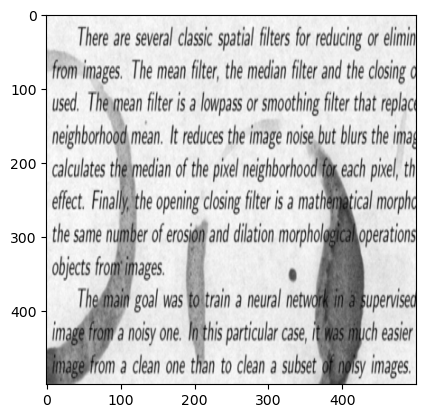

In [40]:
plt.imshow(x_test[15], cmap='gray')
plt.show()

In [ ]:
model2=createModel(50)
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))